In [6]:
import numpy as np
import pandas as pd
import tensorflow as tf 
from tensorflow import keras
import matplotlib.pyplot as plt 
from keras import datasets,layers,models
import seaborn as sns
import PIL.Image as Image
import cv2
import os
import tensorflow_hub as hub

In [9]:
IMAGE_SHAPE=(224,224)
m = tf.keras.Sequential([
    hub.KerasLayer("https://tfhub.dev/google/tf2-preview/mobilenet_v2/classification/4",input_shape=IMAGE_SHAPE+(3,))
])

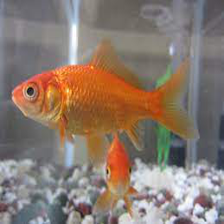

In [26]:
goldfish=Image.open("goldfish.jpg").resize(IMAGE_SHAPE)
goldfish

In [27]:
goldfish=np.array(goldfish)/255
goldfish.shape


(224, 224, 3)

In [28]:
result=m.predict(goldfish[np.newaxis,...])

In [29]:
result

array([[ 0.3555996 ,  5.2928476 , 11.221535  , ..., -1.5385925 ,
         0.43371272, -0.01185626]], dtype=float32)

In [17]:
result.shape

(1, 1001)

In [30]:
result_index=np.argmax(result)
result_index

2

In [22]:
image_label=[]
with open("ImageNetLabels.txt","r") as f:
    image_label=f.read().splitlines()
    

In [31]:
image_label[2]


'goldfish'

In [32]:
path="C:\\Users\\KIIT\\data_sci\\deep learning\\datasets\\flower_photos"

In [33]:
import pathlib

In [34]:
flower_data=pathlib.Path(path)

In [35]:
flower_data

WindowsPath('C:/Users/KIIT/data_sci/deep learning/datasets/flower_photos')

In [36]:
list(flower_data.glob("*/*.jpg"))[:5]

[WindowsPath('C:/Users/KIIT/data_sci/deep learning/datasets/flower_photos/daisy/100080576_f52e8ee070_n.jpg'),
 WindowsPath('C:/Users/KIIT/data_sci/deep learning/datasets/flower_photos/daisy/10140303196_b88d3d6cec.jpg'),
 WindowsPath('C:/Users/KIIT/data_sci/deep learning/datasets/flower_photos/daisy/10172379554_b296050f82_n.jpg'),
 WindowsPath('C:/Users/KIIT/data_sci/deep learning/datasets/flower_photos/daisy/10172567486_2748826a8b.jpg'),
 WindowsPath('C:/Users/KIIT/data_sci/deep learning/datasets/flower_photos/daisy/10172636503_21bededa75_n.jpg')]

In [37]:
roses=list(flower_data.glob("roses/*"))
roses[:5]

[WindowsPath('C:/Users/KIIT/data_sci/deep learning/datasets/flower_photos/roses/10090824183_d02c613f10_m.jpg'),
 WindowsPath('C:/Users/KIIT/data_sci/deep learning/datasets/flower_photos/roses/102501987_3cdb8e5394_n.jpg'),
 WindowsPath('C:/Users/KIIT/data_sci/deep learning/datasets/flower_photos/roses/10503217854_e66a804309.jpg'),
 WindowsPath('C:/Users/KIIT/data_sci/deep learning/datasets/flower_photos/roses/10894627425_ec76bbc757_n.jpg'),
 WindowsPath('C:/Users/KIIT/data_sci/deep learning/datasets/flower_photos/roses/110472418_87b6a3aa98_m.jpg')]

In [38]:
dandelion=list(flower_data.glob("dandelion\*"))
sunflowers=list(flower_data.glob("sunflowers\*"))
tulips=list(flower_data.glob("tulips\*"))
daisy=list(flower_data.glob("daisy\*"))

In [39]:
flower_image_dic={'roses':list(flower_data.glob("roses/*")),
                 "dandelion":list(flower_data.glob("dandelion\*")),
                "sunflowers":list(flower_data.glob("sunflowers\*")),
                 "tulips":list(flower_data.glob("tulips\*")),
                 "daisy":list(flower_data.glob("daisy\*"))
                 
                 
                 }

In [40]:
flowers_labels_dict = {
    'roses': 0,
    'daisy': 1,
    'dandelion': 2,
    'sunflowers': 3,
    'tulips': 4,
}

In [44]:
X, y = [], []

for flower_name, images in flower_image_dic.items():
    for image in images:
        img = cv2.imread(str(image))
        resized_img = cv2.resize(img,(224,224))
        X.append(resized_img)
        y.append(flowers_labels_dict[flower_name])

In [45]:
x=np.array(X)
y=np.array(y)

In [46]:
x=x/255

In [48]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=67)

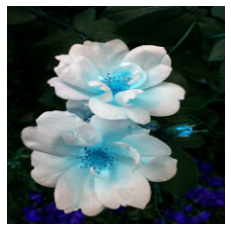

In [51]:
plt.axis("off")
plt.imshow(x[0])

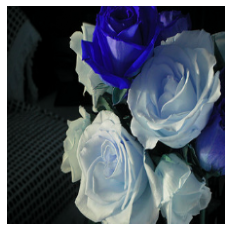

In [52]:
plt.axis("off")
plt.imshow(x[1])

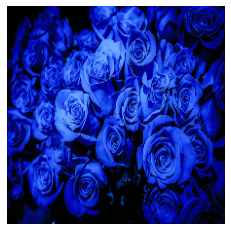

In [53]:
plt.axis("off")
plt.imshow(x[2])

In [59]:
predicted=m.predict(np.array([x[0],x[1],x[2]]))
predicted=np.argmax(predicted,axis=1)
predicted

array([585, 460, 886], dtype=int64)

In [62]:
image_label[predicted[2]]

'velvet'

In [63]:
feature_extractor_model = "https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4"

pretrained_model_without_top_layer = hub.KerasLayer(
    feature_extractor_model, input_shape=(224, 224, 3), trainable=False)

In [67]:
model=tf.keras.Sequential([
    pretrained_model_without_top_layer,
    layers.Dense(5)
    ])

model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer_2 (KerasLayer)  (None, 1280)              2257984   
                                                                 
 dense_2 (Dense)             (None, 5)                 6405      
                                                                 
Total params: 2,264,389
Trainable params: 6,405
Non-trainable params: 2,257,984
_________________________________________________________________


In [68]:
model.compile(
  optimizer="adam",
  loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
  metrics=['acc'])

model.fit(x_train,y_train,epochs=5)

Epoch 1/5
81/81 [==============================] - 56s 619ms/step - loss: 0.8020 - acc: 0.7123
Epoch 2/5
81/81 [==============================] - 47s 585ms/step - loss: 0.4110 - acc: 0.8610
Epoch 3/5
81/81 [==============================] - 44s 545ms/step - loss: 0.3218 - acc: 0.8980
Epoch 4/5
81/81 [==============================] - 50s 612ms/step - loss: 0.2684 - acc: 0.9183
Epoch 5/5
81/81 [==============================] - 59s 726ms/step - loss: 0.2375 - acc: 0.9334


In [69]:
model.evaluate(x_test,y_test)

35/35 [==============================] - 27s 747ms/step - loss: 0.3447 - acc: 0.8747


[0.3447142541408539, 0.8746594190597534]